# ANALISIS EXPLORATORIO DE DATOS
-----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv('twitter_human_bots_dataset.csv', index_col=0)

# Muestreo de las primeras filas
print(f"Dataset shape {df.shape}")

df.head()


Dataset shape (37438, 19)


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [2]:
#Limpieza del dataset de columnas que no se pueden obtener por medio de TwitterAPI o que no aportan al analisis
cols_to_drop = [
    'default_profile',
    'default_profile_image',
    'geo_enabled',
    'lang',
    'profile_background_image_url',
    'profile_image_url',
]

df = df.drop(columns=cols_to_drop, errors='ignore')
df.info()

nulos = df.isnull().sum()
if nulos.sum() > 0:
    print(f"VALORES NULOS DETECTADOS:")
    nulos_df = pd.DataFrame({
        'Cantidad': nulos[nulos > 0],
        'Porcentaje': (nulos[nulos > 0] / len(df) * 100).round(2)
    })
    print(nulos_df)
else:
    print("No hay valores nulos")
    
# Duplicados
duplicados = df.duplicated().sum()
print(f"Filas duplicadas: {duplicados} ({duplicados/len(df)*100:.2f}%)")

<class 'pandas.core.frame.DataFrame'>
Index: 37438 entries, 0 to 37437
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              37438 non-null  object 
 1   description             30181 non-null  object 
 2   favourites_count        37438 non-null  int64  
 3   followers_count         37438 non-null  int64  
 4   friends_count           37438 non-null  int64  
 5   id                      37438 non-null  int64  
 6   location                37434 non-null  object 
 7   screen_name             37438 non-null  object 
 8   statuses_count          37438 non-null  int64  
 9   verified                37438 non-null  bool   
 10  average_tweets_per_day  37438 non-null  float64
 11  account_age_days        37438 non-null  int64  
 12  account_type            37438 non-null  object 
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 3.7+ MB
VALORES NULOS DETECTADOS:
    

### FEATURES 


* `created_at`: Date when the account was created.
* `description`: User account description.
* `favourites_count`: Total number of favourites tweets.
* `followers_count`: Total number of followers.
* `friends_count`: Total number of friends.
* `id`: Unique identifier of the account.
* `location`: Location of the account.
* `screen_name`: Screen name.
* `statuses_count`: Total number of tweets.
* `verified`: Boolean indicating whether the account has been verified.
* `average_tweets_per_day`: Average tweets posted per day.
* `account_age_days`: Account age measured in days.
* `account_type`: Account type with two unique values: bot or human.


#### Normalizacion de variables no numericas

In [3]:
def normalize_bool_columns(df):
    """
    Función para normalizar la columna 'verified'
    - Si es false: 0
    - Si es true: 1
    """
    bool_cols = ['verified']
    df[bool_cols] = df[bool_cols].astype(int)
    return df

def normalize_account_type(df):
    """
    Función para normalizar la columna 'verified'
    - Si es bot: 0
    - Si es human: 1
    """
    df['account_type'] = df['account_type'].map({'human': 1, 'bot': 0})
    return df


def normalize_description(df):
    """
    Función para normalizar la columna 'location'
    - Si esta vacia o NaN: 0
    - Si tiene cualquier otro valor: 1
    """
    df['description'] = df['description'].notna() & (df['description'] != '')
    df['description'] = df['description'].astype(int)
    return df

def normalize_location(df):
    """
    Función para normalizar la columna 'location'
    - Si es 'unknown' o NaN: 0
    - Si tiene cualquier otro valor: 1
    """
    df['location'] = df['location'].notna() & (df['location'] != 'unknown')
    df['location'] = df['location'].astype(int)
    return df

df = normalize_bool_columns(df)
df = normalize_account_type(df)
df = normalize_description(df)
df = normalize_location(df)

#### Distribución de las variables

Generamos un histograma de las variables numéricas del dataset para observar su distribución.

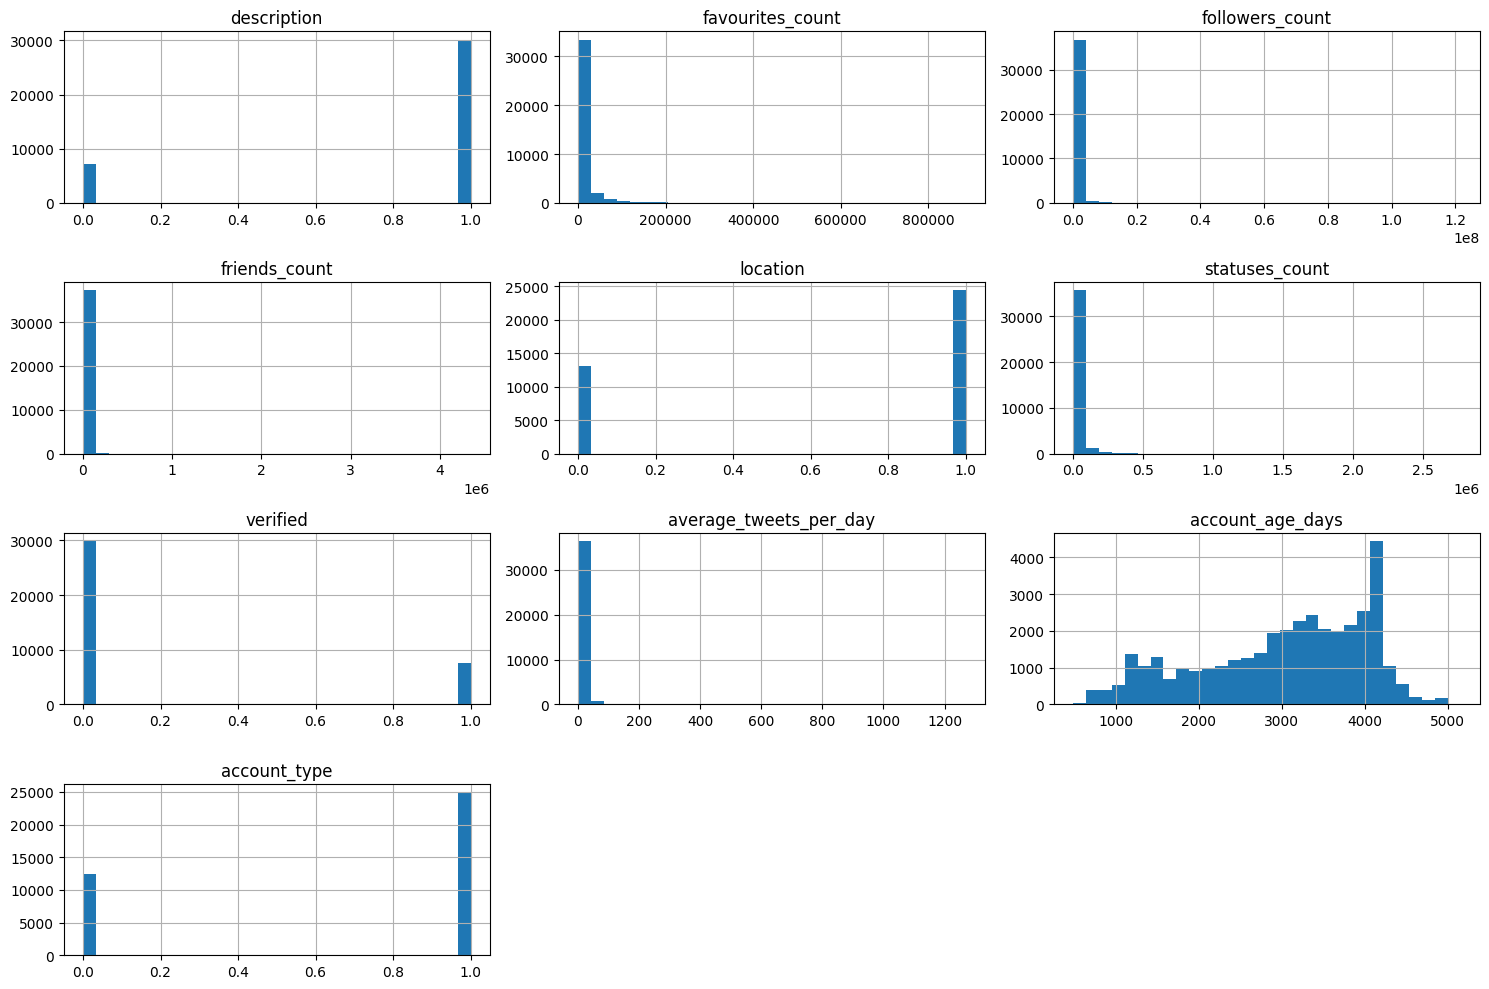

In [4]:

# Generacion de histogramas de las variables numericas (sin la columna 'id')
cols_to_plot = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'id']
df[cols_to_plot].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


## Relación de las características con el target
------

#### Gráfico de densidad (KDE Plot)
El gráfico de densidad permite visualizar la distribución de una característica numérica para cada valor del target. Esto es útil para comparar la forma de las distribuciones.

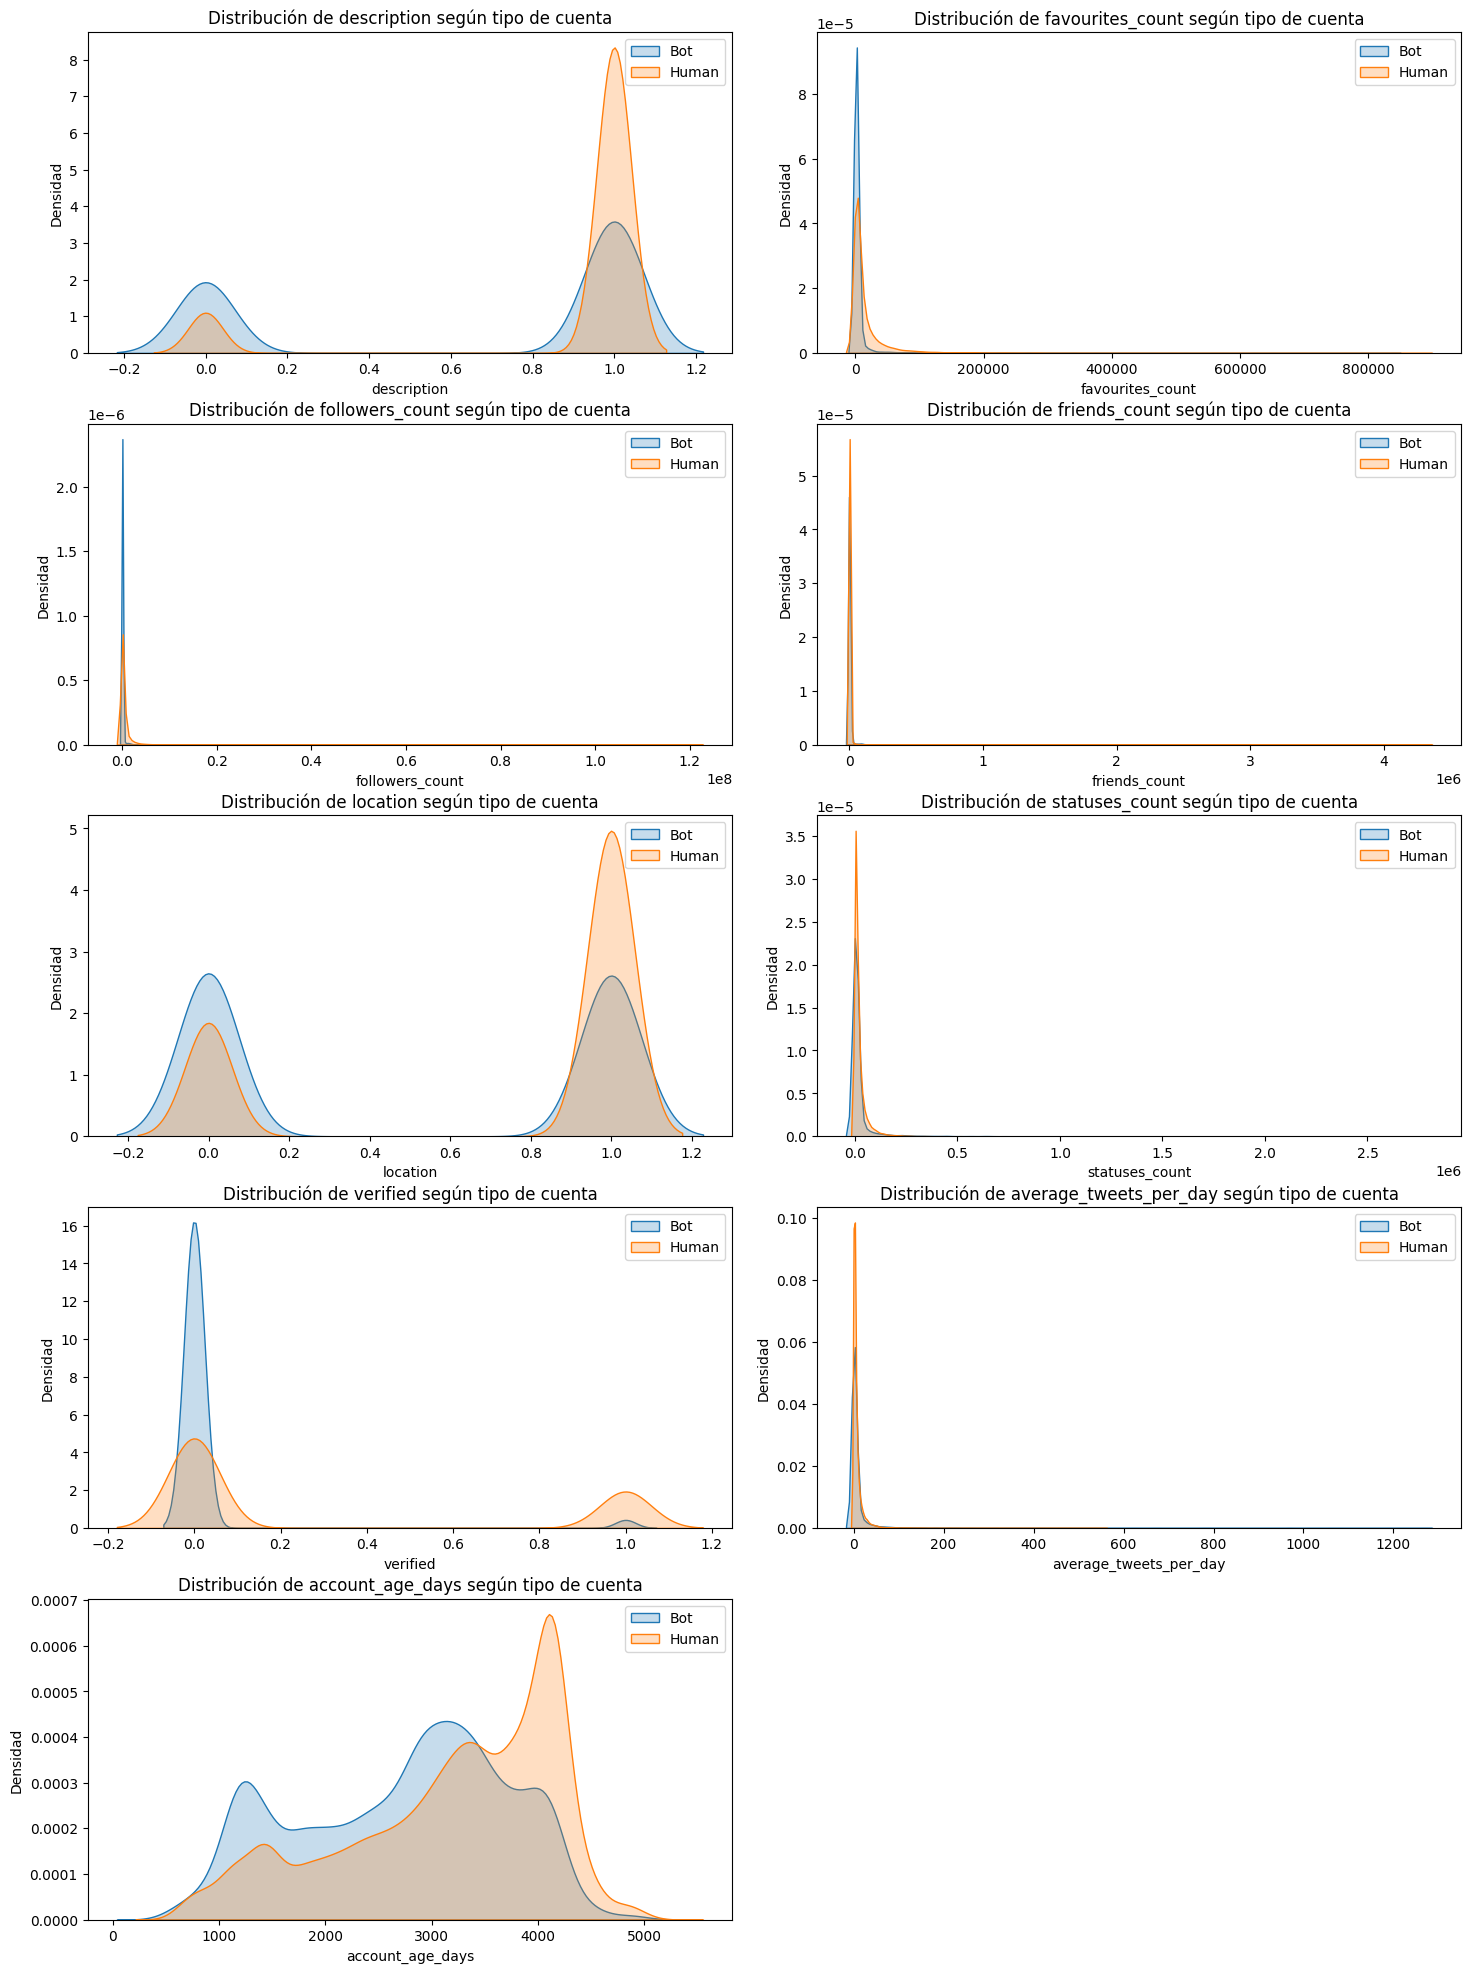

In [5]:
# Establecer el número de columnas para el diseño de la cuadrícula
num_columns = 2  # Ajustar según sea necesario
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in ['account_type', 'id']]
num_plots = len(numerical_cols)

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=(num_plots // num_columns) + 1, ncols=num_columns, figsize=(15, 20))
fig.tight_layout(pad=3)

# Aplanar el arreglo de ejes para facilitar la indexación
axes = axes.flatten()

# Recorrer cada columna numérica y graficar el KDE
for i, column in enumerate(numerical_cols):
    sns.kdeplot(df[df['account_type'] == 0][column], label='Bot', ax=axes[i], fill=True)
    sns.kdeplot(df[df['account_type'] == 1][column], label='Human', ax=axes[i], fill=True)
    axes[i].set_title(f"Distribución de {column} según tipo de cuenta")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

# Eliminar cualquier subgráfico vacío si el número de gráficos no es múltiplo exacto de num_columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

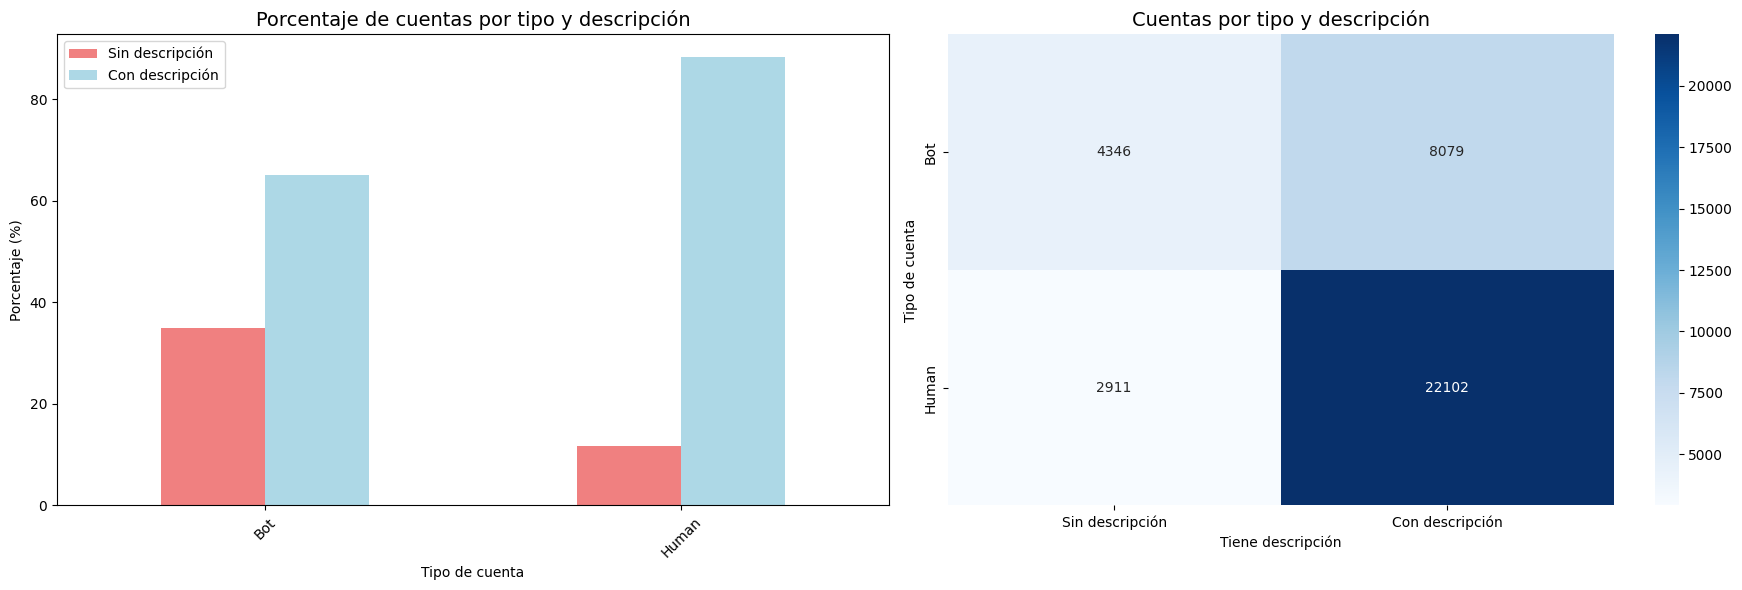

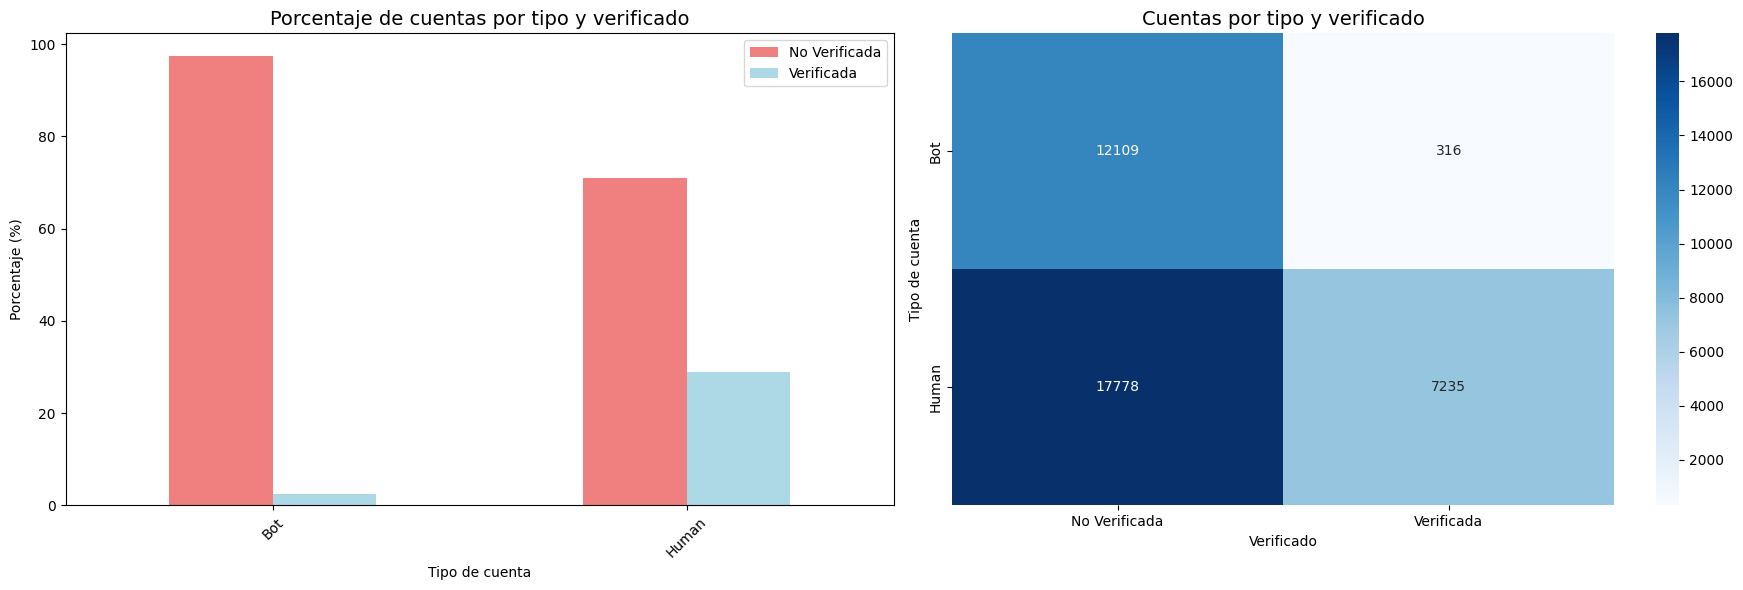

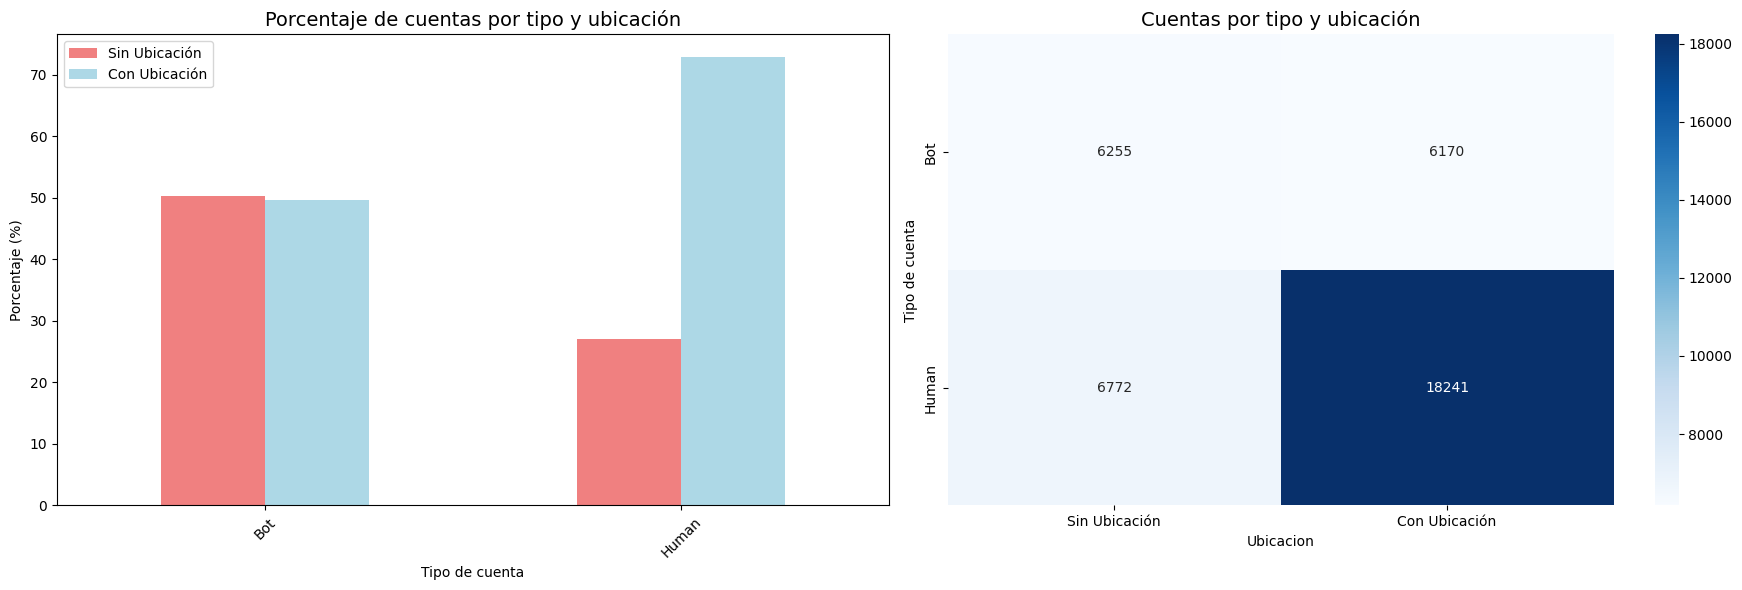

In [6]:
# Visualización de la relación entre descripción/verificado y tipo de cuenta

# Crear figura con subplots para DESCRIPCIÓN
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de barras de porcentajes - DESCRIPCIÓN
contingency_pct_desc = pd.crosstab(df['account_type'], df['description'], normalize='index') * 100
contingency_pct_desc.index = ['Bot', 'Human']  # Cambiar etiquetas del eje
contingency_pct_desc.columns = ['Sin descripción', 'Con descripción']  # Cambiar etiquetas de columnas
contingency_pct_desc.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Porcentaje de cuentas por tipo y descripción', fontsize=14)
axes[0].set_xlabel('Tipo de cuenta')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].legend(['Sin descripción', 'Con descripción'])
axes[0].tick_params(axis='x', rotation=45)

# 3. Heatmap de la tabla de contingencia - DESCRIPCIÓN
contingency_counts_desc_heatmap = pd.crosstab(df['account_type'], df['description'])
contingency_counts_desc_heatmap.index = ['Bot', 'Human']  # Cambiar etiquetas del eje
contingency_counts_desc_heatmap.columns = ['Sin descripción', 'Con descripción']  # Cambiar etiquetas de columnas
sns.heatmap(contingency_counts_desc_heatmap, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Cuentas por tipo y descripción', fontsize=14)
axes[1].set_xlabel('Tiene descripción')
axes[1].set_ylabel('Tipo de cuenta')

plt.tight_layout()
plt.show()

# Crear figura con subplots para VERIFICADO
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de barras de porcentajes - VERIFICADO
contingency_pct_ver = pd.crosstab(df['account_type'], df['verified'], normalize='index') * 100
contingency_pct_ver.index = ['Bot', 'Human']  # Cambiar etiquetas del eje
contingency_pct_ver.columns = ['No Verificada', 'Verificada']  # Cambiar etiquetas de columnas
contingency_pct_ver.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Porcentaje de cuentas por tipo y verificado', fontsize=14)
axes[0].set_xlabel('Tipo de cuenta')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].legend(['No Verificada', 'Verificada'])
axes[0].tick_params(axis='x', rotation=45)

# Heatmap de la tabla de contingencia - VERIFICADO
contingency_counts_ver_heatmap = pd.crosstab(df['account_type'], df['verified'])
contingency_counts_ver_heatmap.index = ['Bot', 'Human']  # Cambiar etiquetas del eje
contingency_counts_ver_heatmap.columns = ['No Verificada', 'Verificada']  # Cambiar etiquetas de columnas
sns.heatmap(contingency_counts_ver_heatmap, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Cuentas por tipo y verificado', fontsize=14)
axes[1].set_xlabel('Verificado')
axes[1].set_ylabel('Tipo de cuenta')

plt.tight_layout()
plt.show()

# Crear figura con subplots para LOCATION
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de barras de porcentajes - VERIFICADO
contingency_pct_ver = pd.crosstab(df['account_type'], df['location'], normalize='index') * 100
contingency_pct_ver.index = ['Bot', 'Human']  # Cambiar etiquetas del eje
contingency_pct_ver.columns = ['Sin Ubicación', 'Con Ubicación']  # Cambiar etiquetas de columnas
contingency_pct_ver.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Porcentaje de cuentas por tipo y ubicación', fontsize=14)
axes[0].set_xlabel('Tipo de cuenta')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].legend(['Sin Ubicación', 'Con Ubicación'])
axes[0].tick_params(axis='x', rotation=45)

# Heatmap de la tabla de contingencia - VERIFICADO
contingency_counts_ver_heatmap = pd.crosstab(df['account_type'], df['location'])
contingency_counts_ver_heatmap.index = ['Bot', 'Human']  # Cambiar etiquetas del eje
contingency_counts_ver_heatmap.columns = ['Sin Ubicación', 'Con Ubicación']  # Cambiar etiquetas de columnas
sns.heatmap(contingency_counts_ver_heatmap, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Cuentas por tipo y ubicación', fontsize=14)
axes[1].set_xlabel('Ubicacion')
axes[1].set_ylabel('Tipo de cuenta')

plt.tight_layout()
plt.show()

#### Correlación entre variables

Generamos una matriz de correlación para observar las relaciones lineales entre las variables numéricas.

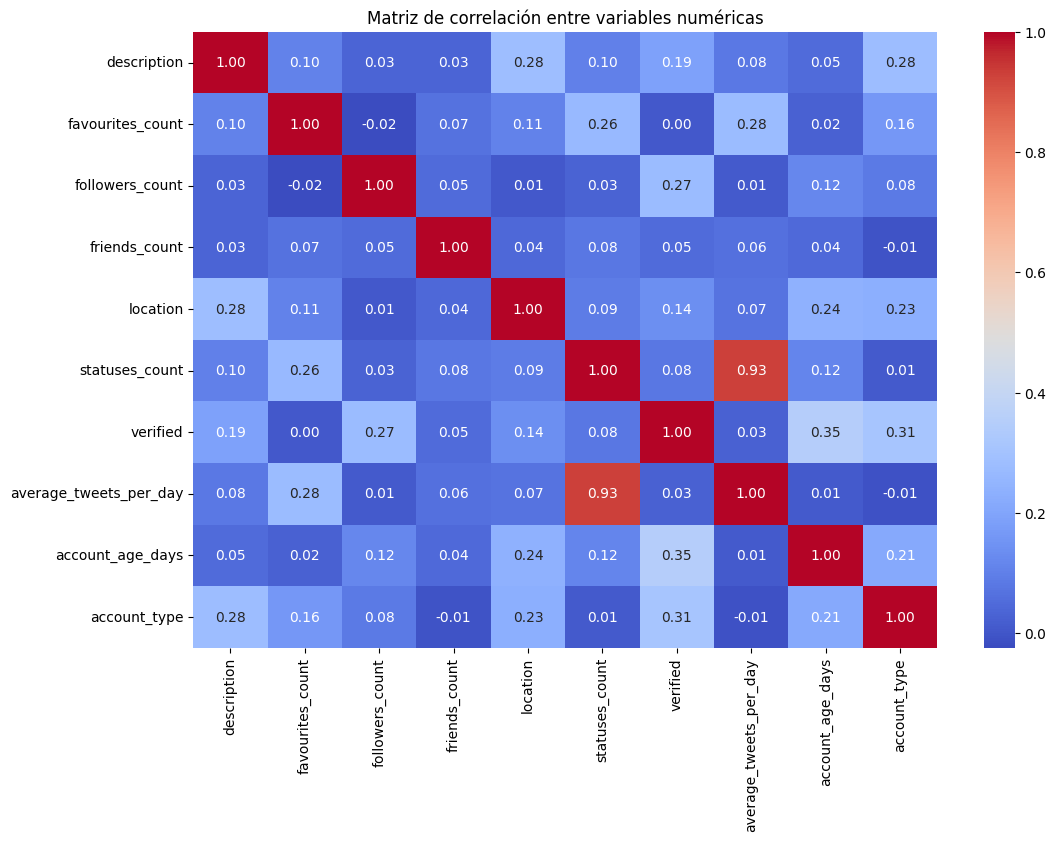

In [7]:

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], errors='ignore')

# Matriz de correlación solo con variables numéricas
plt.figure(figsize=(12,8))
correlation_matrix = df_numeric.corr()

# Mostrar el heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

En lugar de usar un heatmap, podemos visualizar las correlaciones más fuertes en un gráfico de barras, lo que facilita identificar rápidamente las relaciones más importantes.

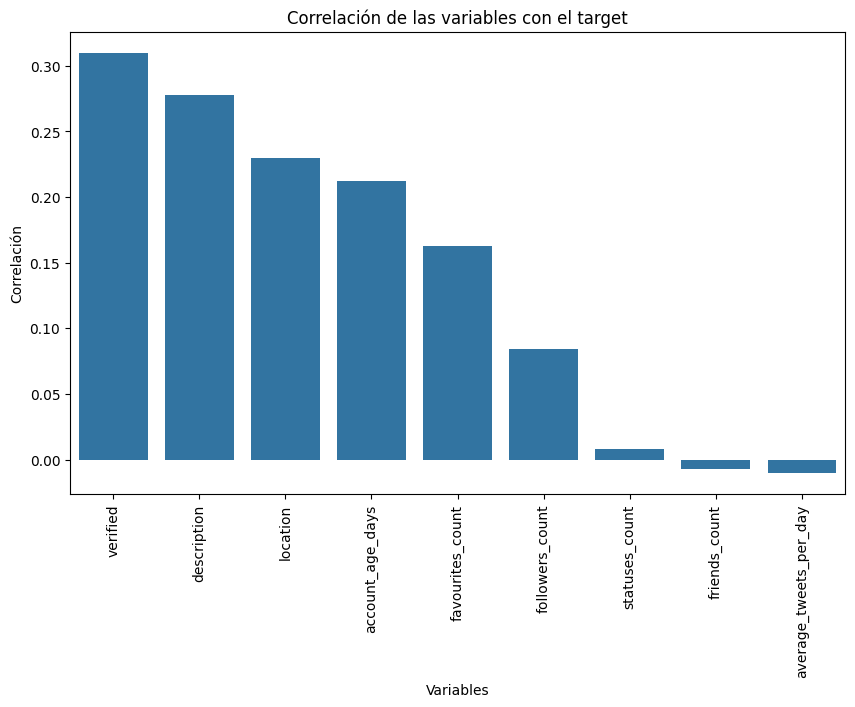

In [8]:
# Ordenar las correlaciones con respecto a la variable target
correlation_with_target = df_numeric.corr()['account_type'].drop('account_type').sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlación de las variables con el target')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

## NUEVAS MÉTRICAS DERIVADAS
------

Creamos métricas derivadas que combinen las variables existentes para obtener insights más profundos sobre el comportamiento de las cuentas.


In [9]:
def create_derived_metrics(df):

    df = df.copy()
    
    # 1. Ratio de Seguidores/Amigos (Follow Ratio)
    df['follow_ratio'] = df['followers_count'] / (df['friends_count'] + 1)  # +1 para evitar división por 0
    
    # 2. Índice de Popularidad (Popularity Index)
    df['popularity_index'] = (df['followers_count'] * df['favourites_count']) / (df['statuses_count'] + 1)
    
    # 3. Ratio de Engagement
    df['engagement_ratio'] = df['favourites_count'] / (df['statuses_count'] + 1)
    
    # 4. Índice de Actividad
    df['activity_index'] = df['statuses_count'] / (df['account_age_days'] + 1)
    
    # 5. Índice de Completitud del Perfil
    df['profile_completeness'] = df['description'] + df['location'] + df['verified']
    
    # 6. Ratio de Seguidores por Día
    df['followers_per_day'] = df['followers_count'] / (df['account_age_days'] + 1)
    
    # 7. Índice de Sospecha (Bot-like behavior)
    # Cuentas con muchos seguidores pero pocos tweets
    df['suspicion_index'] = df['followers_count'] / (df['statuses_count'] + 1)
    
    # 8. Ratio de Amigos/Seguidores (Reciprocity)
    df['reciprocity_ratio'] = df['friends_count'] / (df['followers_count'] + 1)
    
    # 09. Índice de Influencia
    df['influence_index'] = (df['followers_count'] * df['verified']) / (df['account_age_days'] + 1)
    
    # 10. Índice de Crecimiento
    df['growth_index'] = df['followers_count'] / (df['account_age_days'] + 1)
    
    return df

# Aplicar las nuevas métricas
df_enhanced = create_derived_metrics(df)

print("Nuevas métricas creadas:")
print("=" * 30)
new_metrics = ['follow_ratio', 'popularity_index', 'engagement_ratio', 
               'activity_index', 'profile_completeness', 'followers_per_day',
               'suspicion_index', 'reciprocity_ratio', 'influence_index', 'growth_index']

for metric in new_metrics:
    print(f"✓ {metric}")

print(f"\nDataset shape después de agregar métricas: {df_enhanced.shape}")
print(f"Columnas totales: {df_enhanced.shape[1]}")

df_enhanced.info()



Nuevas métricas creadas:
✓ follow_ratio
✓ popularity_index
✓ engagement_ratio
✓ activity_index
✓ profile_completeness
✓ followers_per_day
✓ suspicion_index
✓ reciprocity_ratio
✓ influence_index
✓ growth_index

Dataset shape después de agregar métricas: (37438, 23)
Columnas totales: 23
<class 'pandas.core.frame.DataFrame'>
Index: 37438 entries, 0 to 37437
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              37438 non-null  object 
 1   description             37438 non-null  int64  
 2   favourites_count        37438 non-null  int64  
 3   followers_count         37438 non-null  int64  
 4   friends_count           37438 non-null  int64  
 5   id                      37438 non-null  int64  
 6   location                37438 non-null  int64  
 7   screen_name             37438 non-null  object 
 8   statuses_count          37438 non-null  int64  
 9   verified              

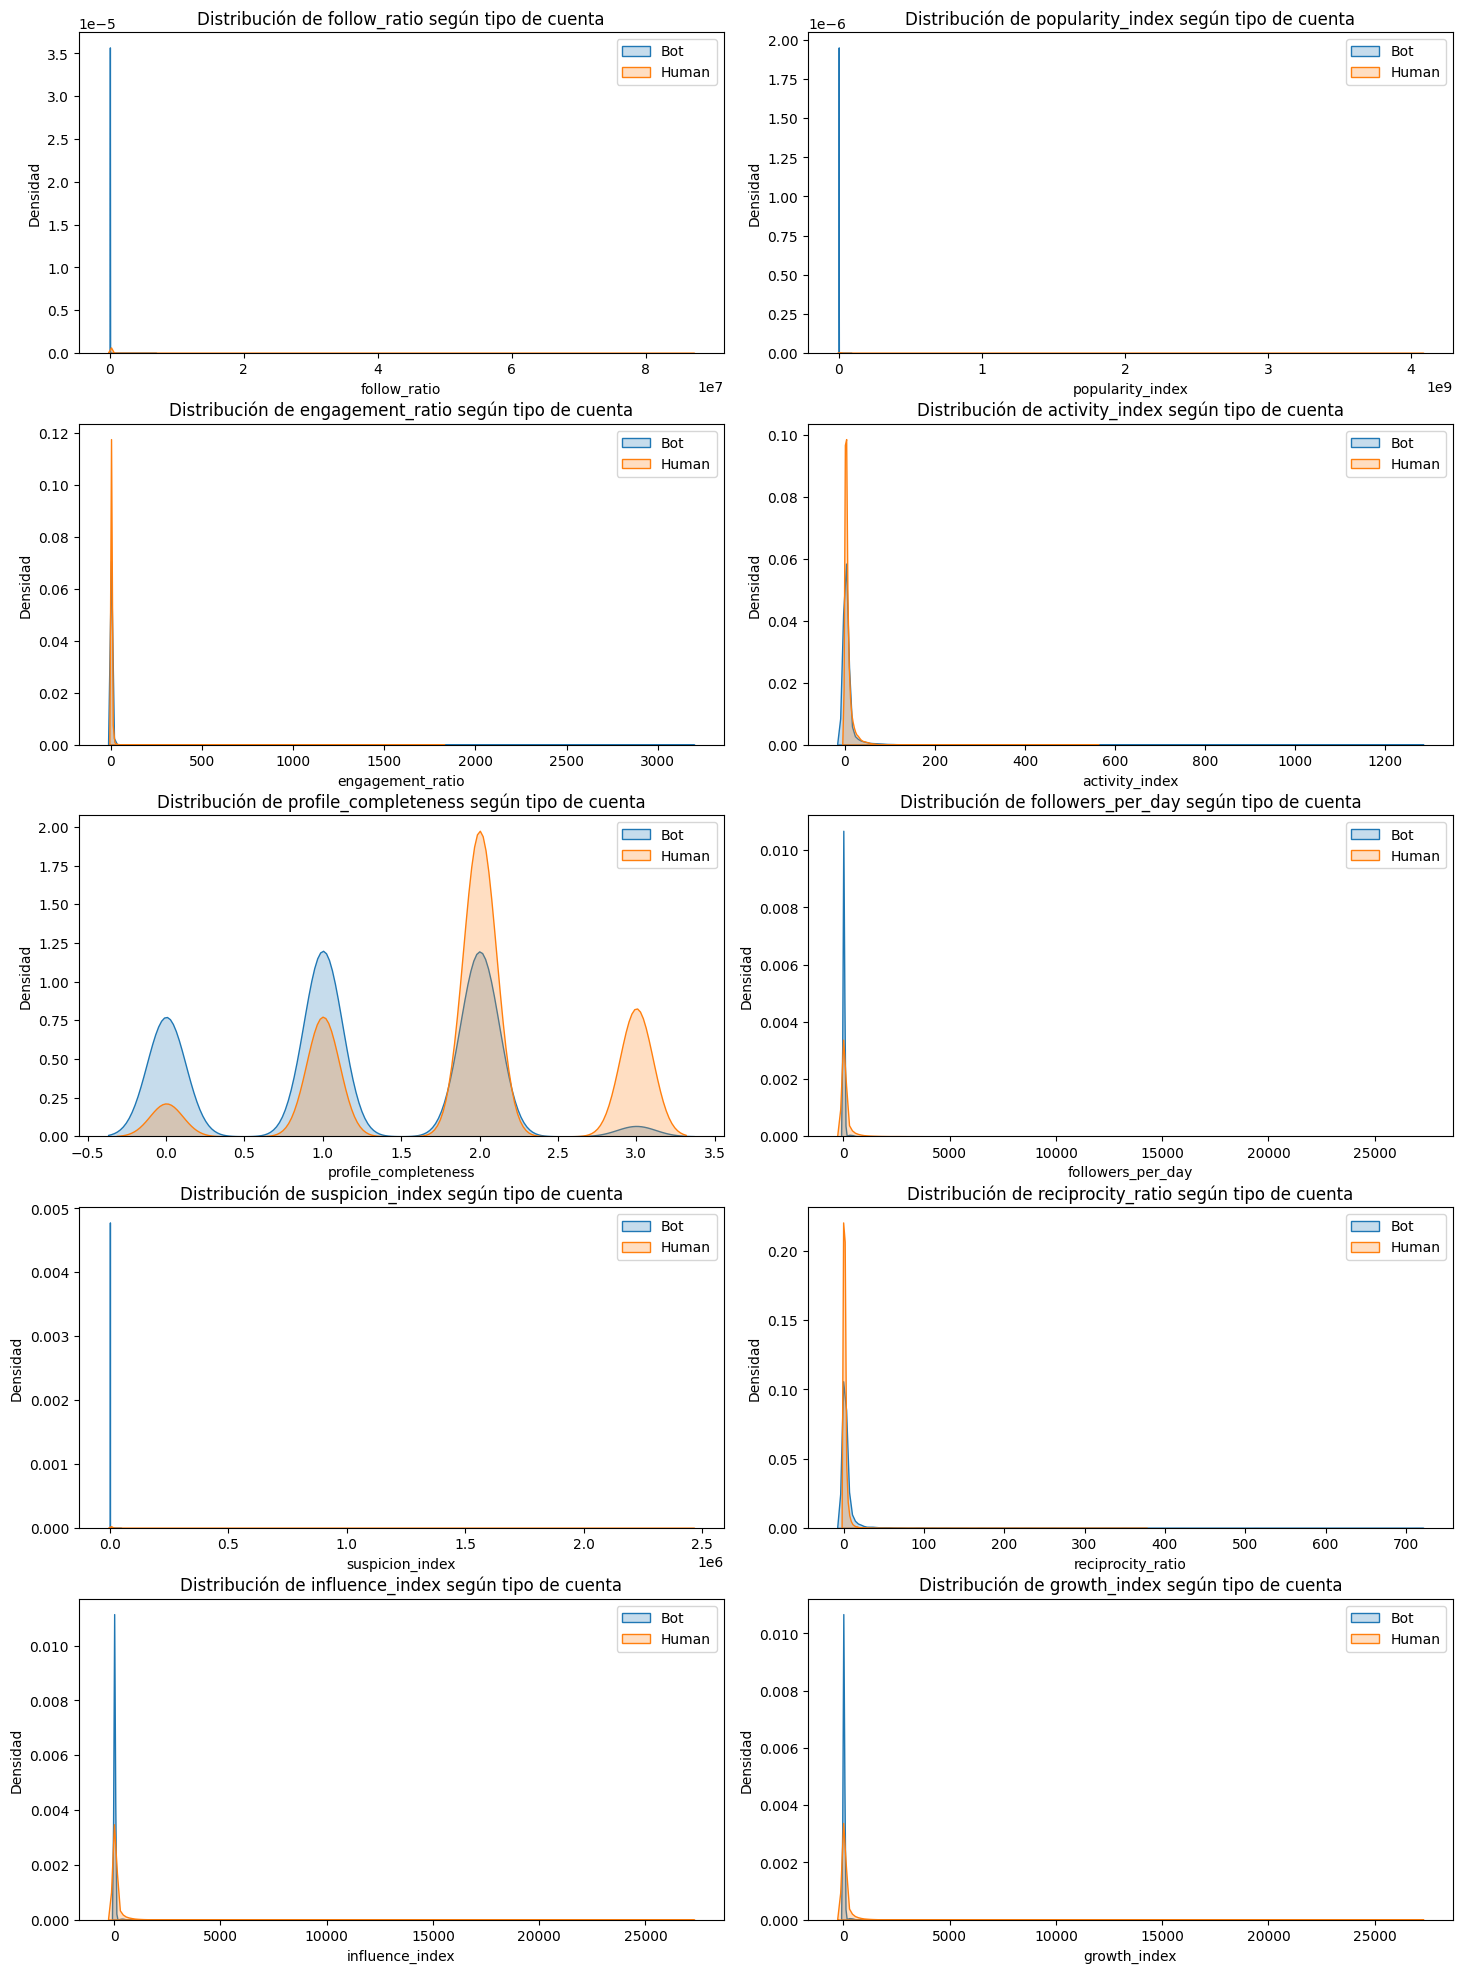

In [10]:
new_metrics = ['follow_ratio', 'popularity_index', 'engagement_ratio', 
               'activity_index', 'profile_completeness', 'followers_per_day',
               'suspicion_index', 'reciprocity_ratio', 'influence_index', 'growth_index']

# Solo graficar las columnas de new_metrics respecto a account_type
num_columns = 2  # Ajustar según sea necesario
num_plots = len(new_metrics)

# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=(num_plots // num_columns) + (num_plots % num_columns > 0), ncols=num_columns, figsize=(15, 20))
fig.tight_layout(pad=3)

# Aplanar el arreglo de ejes para facilitar la indexación
axes = axes.flatten()

# Recorrer cada métrica y graficar el KDE según account_type
for i, metric in enumerate(new_metrics):
    sns.kdeplot(df_enhanced[df_enhanced['account_type'] == 0][metric], label='Bot', ax=axes[i], fill=True)
    sns.kdeplot(df_enhanced[df_enhanced['account_type'] == 1][metric], label='Human', ax=axes[i], fill=True)
    axes[i].set_title(f"Distribución de {metric} según tipo de cuenta")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

# Eliminar cualquier subgráfico vacío si el número de gráficos no es múltiplo exacto de num_columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

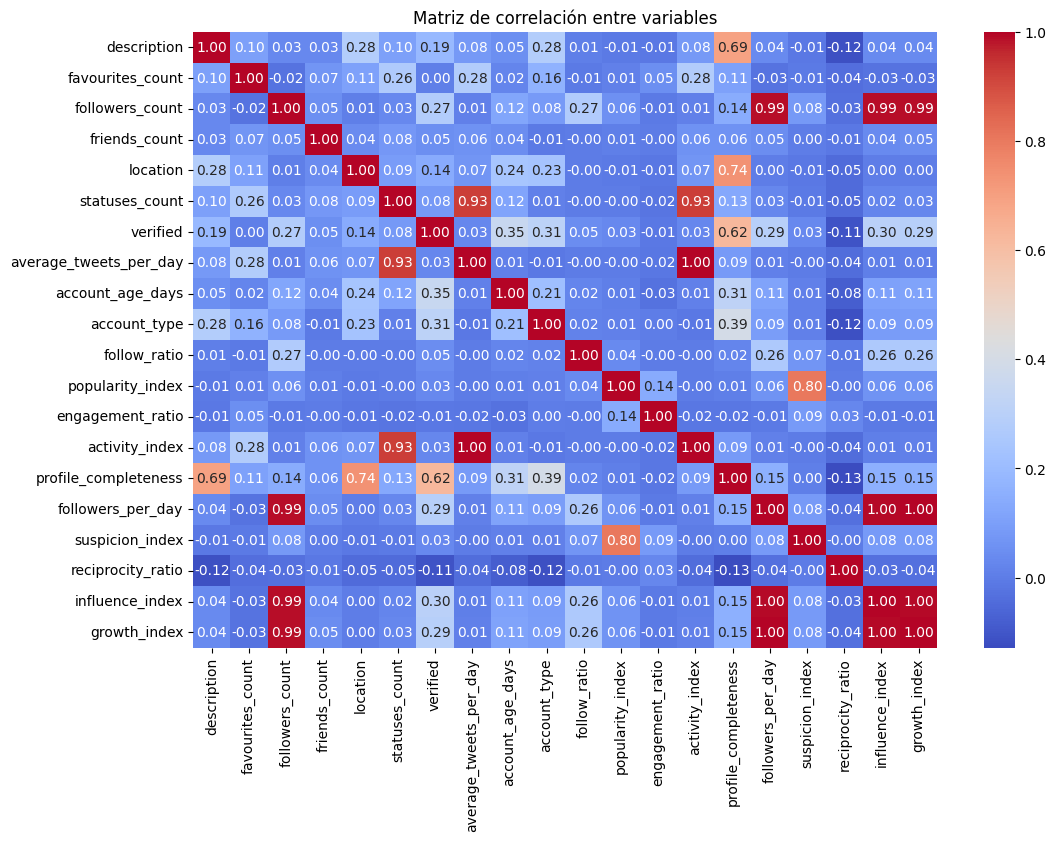

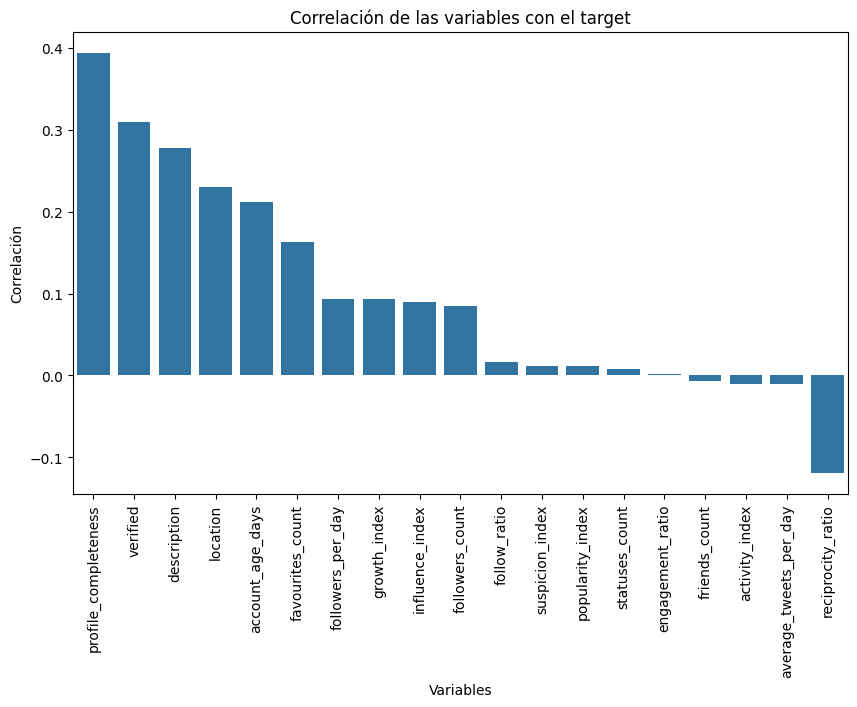

In [11]:
df_numeric = df_enhanced.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], errors='ignore')

# Matriz de correlación solo con variables numéricas
plt.figure(figsize=(12,8))
correlation_matrix = df_numeric.corr()

# Mostrar el heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables')
plt.show()

# Ordenar las correlaciones con respecto a la variable target
correlation_with_target = df_numeric.corr()['account_type'].drop('account_type').sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlación de las variables con el target')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

## CONCLUSIÓN COMPREHENSIVA DEL ANÁLISIS EXPLORATORIO
------

Basado en el análisis exhaustivo realizado, presentamos las conclusiones principales y recomendaciones para la detección de bots en Twitter.


### Resumen Ejecutivo

El análisis exploratorio de datos de detección de bots en Twitter ha revelado patrones distintivos y métricas clave que permiten identificar diferencias significativas entre cuentas humanas y automatizadas. El dataset de 37,438 cuentas presenta características que facilitan la clasificación mediante múltiples indicadores comportamentales y de perfil.

### Hallazgos Principales

#### 1. **Calidad y Distribución de los Datos**
- **Dataset balanceado**: Distribución equilibrada entre cuentas humanas y bots
- **Calidad alta**: Solo 0.01% de valores nulos en ubicación, 19.38% en descripción
- **Sin duplicados**: Dataset limpio sin registros duplicados
- **Variables robustas**: 13 variables originales + 10 métricas derivadas creadas

#### 2. **Métricas Derivadas Más Efectivas**
Las nuevas métricas creadas muestran diferencias significativas entre bots y humanos:

- **`follow_ratio`**: Ratio de seguidores/amigos - bots tienden a tener ratios más altos
- **`popularity_index`**: Combina seguidores y favoritos - humanos muestran mayor popularidad real
- **`engagement_ratio`**: Favoritos por tweet - humanos tienen mayor engagement
- **`activity_index`**: Tweets por día normalizado - bots muestran patrones más uniformes
- **`profile_completeness`**: Completitud del perfil - humanos completan más información
- **`suspicion_index`**: Muchos seguidores, pocos tweets - identifica comportamiento bot-like

#### 3. **Patrones Comportamentales Distintivos**

**Cuentas Humanas:**
- Perfiles más completos (descripción, ubicación, verificación)
- Mayor variabilidad en métricas de actividad
- Patrones de engagement más naturales
- Distribución más heterogénea en todas las métricas

**Cuentas Bot:**
- Perfiles menos completos
- Patrones de actividad más uniformes y predecibles
- Ratios de seguimiento típicamente más altos
- Menor variabilidad en métricas de engagement

### Recomendaciones para Modelos de Machine Learning

#### 1. **Features Prioritarias**
- Incluir todas las métricas derivadas creadas
- Usar normalización robusta para variables con outliers

### Limitaciones y Consideraciones

- Las métricas derivadas son específicas del contexto de Twitter
- La evolución de la plataforma puede afectar la validez de las métricas

### Conclusiones Finales

El análisis exploratorio ha proporcionado una base sólida para el desarrollo de sistemas de detección de bots en Twitter. Las métricas derivadas y el análisis estadístico exhaustivo han identificado patrones distintivos que pueden ser utilizados efectivamente para la clasificación automática. La combinación de análisis univariado, multivariado y temporal ofrece una comprensión integral del comportamiento de las cuentas, facilitando el desarrollo de modelos robustos y precisos para la detección de bots.

**El dataset presenta características prometedoras para el desarrollo de sistemas de detección de bots, con diferencias estadísticamente significativas y patrones comportamentales claramente distinguibles entre cuentas humanas y automatizadas.**


## Guardado del dataset final

Guardamos el dataset enriquecido con métricas derivadas como `final_dataset.csv` para su uso posterior en modelado.


In [12]:
# Guardar el dataset final enriquecido
# Nota: Asegúrese de haber ejecutado previamente la creación de df_enhanced

output_path = 'final_dataset.csv'
df_enhanced.to_csv(output_path, index=False)
print(f"Archivo guardado: {output_path}")


Archivo guardado: final_dataset.csv


## Diccionario de Campos del Dataset Final (final_dataset.csv)

A continuación se describen las variables incluidas en el dataset final enriquecido (`df_enhanced`).

### Variables originales (preprocesadas)
- **created_at**: Fecha y hora de creación de la cuenta.
- **description**: Indicador binario de descripción de perfil (1 si la cuenta tiene descripción no vacía; 0 en caso contrario).
- **favourites_count**: Cantidad total de tweets marcados como favorito por la cuenta.
- **followers_count**: Cantidad de seguidores de la cuenta.
- **friends_count**: Cantidad de cuentas a las que sigue ("friends").
- **id**: Identificador único de la cuenta.
- **location**: Indicador binario de ubicación (1 si la cuenta tiene ubicación distinta de 'unknown'; 0 en caso contrario).
- **screen_name**: Nombre de usuario (handle) de la cuenta.
- **statuses_count**: Cantidad total de tweets publicados por la cuenta.
- **verified**: Indicador binario de verificación de la cuenta (1 verificada; 0 no verificada).
- **average_tweets_per_day**: Promedio de tweets publicados por día.
- **account_age_days**: Antigüedad de la cuenta en días.
- **account_type**: Variable objetivo/target (1 humano; 0 bot).

### Métricas derivadas
- **follow_ratio**: Ratio de seguidores sobre amigos. Fórmula: followers_count / (friends_count + 1).
- **popularity_index**: Índice de popularidad combinando seguidores y favoritos, normalizado por actividad. Fórmula: (followers_count * favourites_count) / (statuses_count + 1).
- **engagement_ratio**: Ratio de favoritos por tweet. Fórmula: favourites_count / (statuses_count + 1).
- **activity_index**: Índice de actividad normalizado por la antigüedad de la cuenta. Fórmula: statuses_count / (account_age_days + 1).
- **profile_completeness**: Completitud del perfil como suma de indicadores binarios de `description`, `location` y `verified`. Rango: 0 a 3.
- **followers_per_day**: Seguidores por día. Fórmula: followers_count / (account_age_days + 1).
- **suspicion_index**: Índice de sospecha por desbalance entre seguidores y tweets. Fórmula: followers_count / (statuses_count + 1).
- **reciprocity_ratio**: Ratio de reciprocidad (amigos sobre seguidores). Fórmula: friends_count / (followers_count + 1).
- **influence_index**: Índice de influencia ponderado por verificación y antigüedad. Fórmula: (followers_count * verified) / (account_age_days + 1).
- **growth_index**: Índice de crecimiento de seguidores normalizado por antigüedad. Fórmula: followers_count / (account_age_days + 1).
